In [6]:
# Importing desired modles
import pandas as pd
import numpy as np
from numpy import inf
import datetime
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [6]:
# Reading all the three rawdata files 
rawdata = pd.read_csv("Train.csv")
traveldata = pd.read_csv("Train_Vehicletravellingdata.csv", index_col= None)
weatherdata = pd.read_csv("Train_WeatherData.csv")

In [7]:
# Understanding the data dimensions
print("The rawdata has {} rows and  {} columns".format(rawdata.shape[0], rawdata.shape[1]))
print("The traveldata has {} rows and  {} columns".format(traveldata.shape[0], traveldata.shape[1]))
print("The weatherdata has {} rows and  {} columns".format(weatherdata.shape[0], weatherdata.shape[1]))

The rawdata has 12994 rows and  5 columns
The traveldata has 162566 rows and  10 columns
The weatherdata has 162566 rows and  9 columns


In [414]:
# Exploring rawdata further
rawdata.head()

,ID,V2,V5,V6,DrivingStyle
0,DR_24526,1265,10243,2,2
1,DR_30052,1680,30871,6,2
2,DR_40928,936,3224,4,2
3,DR_66033,1503,3315,4,2
4,DR_45266,929,3022,4,2


The above dataset which has five variables Driving Style is the one which we wish to predict. The ID variable is a unique variable and is going to be the key variable in concatinating this dataset with the other two datasets. The other variables are explained below:

- V2: Length of vehicle in cm
- V5: weight of vehicle in kg
- V6: Number of axles

We will use this information and update the column names.

2    49.4
3    29.2
1    21.3
Name: DrivingStyle, dtype: float64

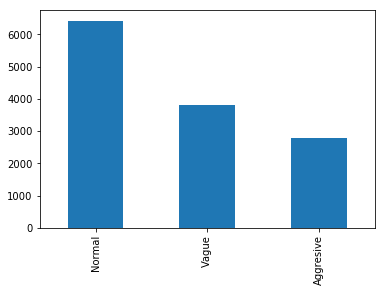

In [415]:
# Upadting the column names 
rawdata.columns = ['ID', 'VehicleLength(cm)', 'VehicleWeight(kg)', 'NumAxles', 'DrivingStyle']

# Barplot showcasing the frequency chart for Driving Style
rawdata['DrivingStyle'].value_counts().plot('bar').set_xticklabels( ('Normal', 'Vague','Aggresive') )

# Frequency table 
round(rawdata['DrivingStyle'].value_counts()/rawdata.shape[0] * 100, 1)

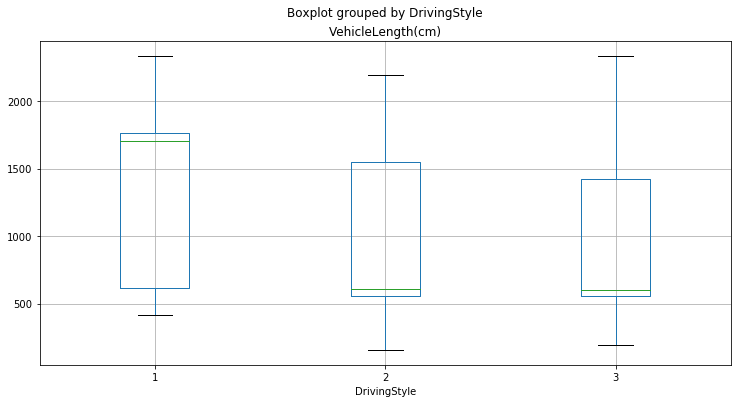

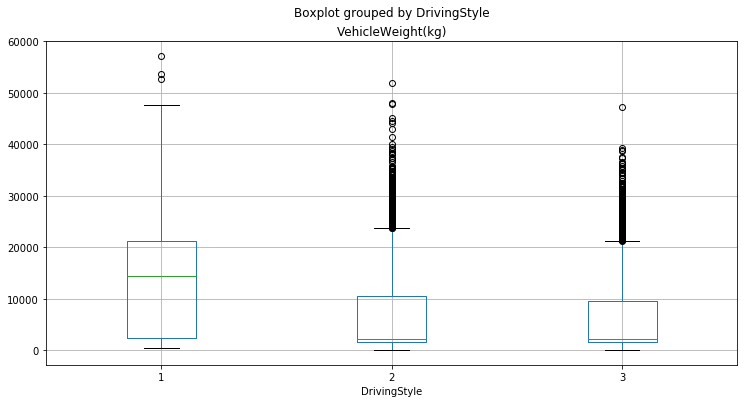

In [29]:
# Checking the distribution of vehicle length and weight across different driving styles. 
rawdata.boxplot(column =  ["VehicleLength(cm)"], by = "DrivingStyle", figsize=(12, 6))
rawdata.boxplot(column =  ["VehicleWeight(kg)"], by = "DrivingStyle", figsize=(12, 6))

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x000001BDA168FDA0>,
      dtype=object)

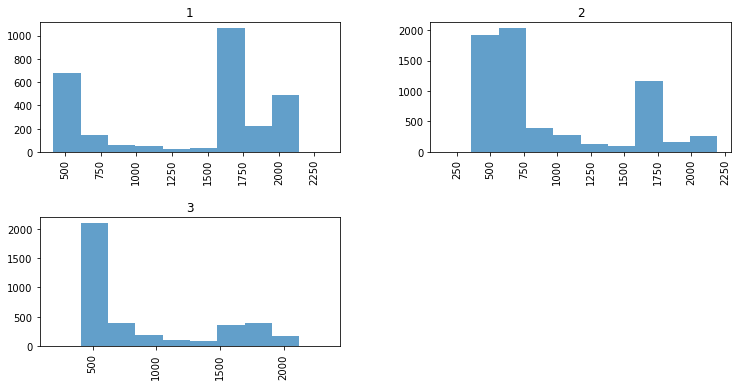

In [33]:
rawdata['VehicleLength(cm)'].hist(by=rawdata['DrivingStyle'], figsize=[12,6], alpha =.7)

In [54]:
# Creating a bunch of new variables form the existing variables in traveldata
unique_id = traveldata['ID'].unique()
pd.to_datetime(traveldata['V1'])

ID = []
SwitchCount = []
TotalJourneyTime = []
RateOfSwitch = []
AvgSpeed = []
MaxSpeed = []

AvgSpeedPrecedingVehicle = []
MaxSpeedPrecedingVehicle = []

AvgTimeGapPreceding =[]
MaxTimeGapPreceding =[]
MinTimeGapPreceding =[]
MedianTimeGapPreceding =[]

AvgLengthvehiclePreceding =[]
MaxLengthvehiclePreceding =[]
MinLengthvehiclePreceding =[]
MedianLengthvehiclePreceding =[]

AvgWeightvehiclePreceding =[]
MaxWeightvehiclePreceding =[]
MinWeightvehiclePreceding =[]
MedianWeightvehiclePreceding =[]

RoadCondition = []

for i in unique_id:
    ID.append(i)
    dfTemp = traveldata[traveldata.ID == i]
    
    JourneyTime = pd.to_datetime(dfTemp.V1.iloc[dfTemp.shape[0]-1]) - pd.to_datetime(dfTemp.V1.iloc[0])
    TotalJourneyTime.append(JourneyTime)
    
    AvgSpeed.append(round(dfTemp.V4.mean(),0))
    MaxSpeed.append(round(dfTemp.V4.max(),0))
    
    AvgSpeedPrecedingVehicle.append(round(dfTemp.V8.mean(),0))
    MaxSpeedPrecedingVehicle.append(round(dfTemp.V8.max(),0))
    
    AvgTimeGapPreceding.append(round(dfTemp.V11.mean(),0))
    MaxTimeGapPreceding.append(round(dfTemp.V11.max(),0))    
    MinTimeGapPreceding.append(round(dfTemp.V11.min(),0))
    MedianTimeGapPreceding.append(round(dfTemp.V11.median(),0))
    
    AvgLengthvehiclePreceding.append(round(dfTemp.V10.mean(),0))
    MaxLengthvehiclePreceding.append(round(dfTemp.V10.max(),0))    
    MinLengthvehiclePreceding.append(round(dfTemp.V10.min(),0))
    MedianLengthvehiclePreceding.append(round(dfTemp.V10.median(),0))
    
    AvgWeightvehiclePreceding.append(round(dfTemp.V9.mean(),0))
    MaxWeightvehiclePreceding.append(round(dfTemp.V9.max(),0))    
    MinWeightvehiclePreceding.append(round(dfTemp.V9.min(),0))
    MedianWeightvehiclePreceding.append(round(dfTemp.V9.median(),0))
    
    RoadCondition.append(dfTemp.V18.iloc[0])
    
    switch_count = 0
    lane = dfTemp["V3"]
    currentValue = []
    nextValue = []
    for j in range(0, len(lane)-1):
        if j < len(lane):
            #print(j)
            currentValue =  dfTemp.V3.iloc[j]
            nextValue = dfTemp.V3.iloc[j+1]
            if nextValue != currentValue:
                switch_count = switch_count + 1    
    SwitchCount.append(switch_count)
    
SwitchCountDF = pd.DataFrame({'ID':ID, 'TotalSwitches': SwitchCount, 'TotalJourneyTime': TotalJourneyTime, 
                              'AvgSpeed':AvgSpeed, 'MaxSpeed': MaxSpeed, 'AvgSpeedPrecedingVehicle':AvgSpeedPrecedingVehicle, 'MaxSpeedPrecedingVehicle': MaxSpeedPrecedingVehicle,
                              'AvgTimeGapPreceding': AvgTimeGapPreceding, 'MaxTimeGapPreceding': MaxTimeGapPreceding,
                              'MinTimeGapPreceding': MinTimeGapPreceding, 'MedianTimeGapPreceding':MedianTimeGapPreceding,
                              'AvgLengthvehiclePreceding': AvgLengthvehiclePreceding, 'MaxLengthvehiclePreceding': MaxLengthvehiclePreceding, 
                              'MinLengthvehiclePreceding': MinLengthvehiclePreceding, 'MedianLengthvehiclePreceding': MedianLengthvehiclePreceding,
                              'AvgWeightvehiclePreceding': AvgWeightvehiclePreceding, 'MaxWeightvehiclePreceding': MaxWeightvehiclePreceding,
                              'MinWeightvehiclePreceding': MinWeightvehiclePreceding, 'MedianWeightvehiclePreceding': MedianWeightvehiclePreceding,
                              'RoadCondition': RoadCondition}, columns = ['ID', 'TotalSwitches', 'TotalJourneyTime', 'AvgSpeed', 'MaxSpeed', 
                                         'AvgSpeedPrecedingVehicle', 'MaxSpeedPrecedingVehicle', 'AvgTimeGapPreceding', 
                                         'MaxTimeGapPreceding', 'MinTimeGapPreceding', 'MedianTimeGapPreceding',
                                         'AvgLengthvehiclePreceding', 'MaxLengthvehiclePreceding', 'MinLengthvehiclePreceding', 
                                         'MedianLengthvehiclePreceding', 'AvgWeightvehiclePreceding', 'MaxWeightvehiclePreceding',
                                         'MinWeightvehiclePreceding', 'MedianWeightvehiclePreceding', 'RoadCondition']
                             )

SwitchCountDF['TotalJourneyTime'] = SwitchCountDF['TotalJourneyTime'].astype('timedelta64[m]')
SwitchCountDF['RateOfSwitch'] = round(SwitchCountDF['TotalSwitches']/SwitchCountDF['TotalJourneyTime'],2)
SwitchCountDF['RateOfSwitch'][SwitchCountDF['RateOfSwitch'] == -inf] = 0

C:\Users\datas\Anaconda3\lib\site-packages\ipykernel\__main__.py:93: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy


In [55]:
# Converting the V1 to datetime variable and extracting weekday or weekend information
weatherdata['V1'] = pd.to_datetime(weatherdata['V1'])
weatherdata['just_date'] = weatherdata['V1'].dt.date
weatherdata['Weekday'] = weatherdata['just_date'].apply(lambda x: x.weekday())

# Checking for the rows which have missing values
null_data = weatherdata[weatherdata.isnull().any(axis=1)]
print("Total number of missing values are {}; Which is {}% of the whole data".format(len(null_data.ID.unique()), round((len(null_data.ID.unique())/SwitchCountDF.shape[0])*100, 2)))


Total number of missing values are 294; Which is 2.26% of the whole data


In [392]:
# Working on weather dataset to extract feature information for each driver ID
ID = []
AirTemp = []
Precipitation = []
PrecipitationIntensity = []
RelHumidity = []
WindDirection = []
WindSpeed = []
Weekday = []
for i in unique_id:
    dfTemp = weatherdata[weatherdata.ID == i]
    if dfTemp.shape[0] != 0:
        ID.append(i)    
        AirTemp.append(Counter(dfTemp['V12']).most_common(1)[0][0])
        Precipitation.append(Counter(dfTemp['V13']).most_common(1)[0][0])
        PrecipitationIntensity.append(Counter(dfTemp['V14']).most_common(1)[0][0])
        RelHumidity.append(Counter(dfTemp['V15']).most_common(1)[0][0])
        WindDirection.append(Counter(dfTemp['V16']).most_common(1)[0][0])
        WindSpeed.append(Counter(dfTemp['V17']).most_common(1)[0][0])    
        Weekday.append(dfTemp.Weekday.iloc[0])
    
weatherFinal = pd.DataFrame({'ID': ID, 'AirTemp': AirTemp, 'Precipitation': Precipitation, 
                             'PrecipitationIntensity': PrecipitationIntensity, 'RelHumidity': RelHumidity,
                             'WindDirection': WindDirection, 'WindSpeed': WindSpeed, 'Weekday': Weekday },
                            columns = ['ID','AirTemp', 'Precipitation', 'PrecipitationIntensity', 'RelHumidity',
                             'WindDirection', 'WindSpeed', 'Weekday'])

weatherFinal['PrecipitationIntensity'] = weatherFinal['PrecipitationIntensity'].apply(lambda x: "Missing" if x == " " else x)

In [442]:
# Saving the Vehicle and weather datasets
weatherFinal.to_csv("weatherFinal.csv", index= False)
SwitchCountDF.to_csv("travelDataFinal.csv", index = False)

In [526]:
# Merging the three datasets
finalRawData= SwitchCountDF.merge(weatherFinal, on = "ID")
finalRawData = finalRawData.merge(rawdata, on = "ID")

In [527]:
print("Final Data Dimensions: {}".format(finalRawData.shape))
finalRawData.columns

Final Data Dimensions: (12847, 28)


Index(['ID', 'TotalSwitches', 'TotalJourneyTime', 'AvgSpeed', 'MaxSpeed',
       'AvgSpeedPrecedingVehicle', 'MaxSpeedPrecedingVehicle',
       'AvgTimeGapPreceding', 'MaxTimeGapPreceding', 'MinTimeGapPreceding',
       'MedianTimeGapPreceding', 'AvgLengthvehiclePreceding',
       'MaxLengthvehiclePreceding', 'MinLengthvehiclePreceding',
       'MedianLengthvehiclePreceding', 'AvgWeightvehiclePreceding',
       'MaxWeightvehiclePreceding', 'MinWeightvehiclePreceding',
       'MedianWeightvehiclePreceding', 'RoadCondition', 'RateOfSwitch',
       'AirTemp', 'Precipitation', 'PrecipitationIntensity', 'RelHumidity',
       'WindDirection', 'WindSpeed', 'Weekday'],
      dtype='object')

In [35]:
# Saving the final dataset
# finalRawData.to_csv("finalRawData.csv", index = False)
finalRawData = pd.read_csv("finalRawData.csv")
# finalRawData['RateOfSwitch'][finalRawData['RateOfSwitch'] == inf] = 0

finalRawData["DrivingStyle"] = finalRawData["DrivingStyle"].apply(lambda x: 1 if x == 1 else 0)

In [36]:
numerical = ['TotalSwitches', 'TotalJourneyTime', 'AvgSpeed', 'MaxSpeed',
       'AvgSpeedPrecedingVehicle', 'MaxSpeedPrecedingVehicle',
       'AvgTimeGapPreceding', 'MaxTimeGapPreceding', 'MinTimeGapPreceding',
       'MedianTimeGapPreceding', 'AvgLengthvehiclePreceding',
       'MaxLengthvehiclePreceding', 'MinLengthvehiclePreceding',
       'MedianLengthvehiclePreceding', 'AvgWeightvehiclePreceding',
       'MaxWeightvehiclePreceding', 'MinWeightvehiclePreceding',
       'MedianWeightvehiclePreceding','RateOfSwitch',
       'AirTemp','RelHumidity',
       'WindDirection', 'WindSpeed','VehicleLength(cm)',
       'VehicleWeight(kg)']

# Replacing missing(blanks) values by nan and inf with 0
for i in numerical:
    finalRawData[i].replace('', np.nan, inplace=True)
    finalRawData[i] = finalRawData[i].apply(lambda x: 0 if x == inf else x)

# Dropping all the NA values - In all ~2% of the data has missing or NA values
finalRawData.dropna(subset=[numerical], inplace=True)

# Checking the summary statistics
finalRawData[numerical].describe()

,TotalSwitches,TotalJourneyTime,AvgSpeed,MaxSpeed,AvgSpeedPrecedingVehicle,MaxSpeedPrecedingVehicle,AvgTimeGapPreceding,MaxTimeGapPreceding,MinTimeGapPreceding,MedianTimeGapPreceding,...,MaxWeightvehiclePreceding,MinWeightvehiclePreceding,MedianWeightvehiclePreceding,RateOfSwitch,AirTemp,RelHumidity,WindDirection,WindSpeed,VehicleLength(cm),VehicleWeight(kg)
count,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,...,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000,12657.000000
mean,4.451134,8.671565,83.718970,97.416923,83.739038,97.429644,207.472387,495.494272,63.305523,170.842459,...,18567.091254,1499.388165,3992.661847,0.540684,4.555424,62.290037,179.833215,4.255748,1024.774433,8064.355376
std,3.956084,30.841301,5.662169,10.397439,5.615351,10.384553,215.625538,319.305080,164.957570,225.010717,...,10878.766947,2271.604988,4790.190582,0.434184,3.258503,18.380075,82.745508,2.997064,562.153993,8974.443098
min,0.000000,0.000000,44.000000,45.000000,42.000000,42.000000,3.000000,3.000000,1.000000,2.000000,...,435.000000,3.000000,345.000000,0.000000,-13.000000,16.000000,6.000000,0.000000,155.000000,44.000000
25%,1.000000,7.000000,81.000000,90.000000,81.000000,90.000000,78.000000,278.000000,1.000000,42.000000,...,10103.000000,830.000000,1698.000000,0.220000,2.000000,48.000000,152.000000,2.000000,561.000000,1734.000000
50%,4.000000,9.000000,84.000000,97.000000,84.000000,97.000000,127.000000,396.000000,3.000000,86.000000,...,20265.000000,1148.000000,1956.000000,0.500000,5.000000,59.000000,180.000000,4.000000,634.000000,2385.000000
75%,6.000000,10.000000,87.000000,103.000000,87.000000,103.000000,248.000000,611.000000,31.000000,194.000000,...,26433.000000,1453.000000,2673.000000,0.780000,7.000000,78.000000,203.000000,7.000000,1694.000000,14352.000000
max,30.000000,3361.000000,130.000000,161.000000,120.000000,161.000000,1642.000000,1797.000000,1642.000000,1642.000000,...,69548.000000,29569.000000,33469.000000,8.000000,23.000000,97.000000,360.000000,14.000000,2337.000000,57230.000000


In [37]:
# Identifying variables which have got outliers on upper and lower sides
# We will be using Interquartile Range Method to identify the outlier
from numpy import percentile
def outlier(data):
    # calculate interquartile range
    q25, q75 = percentile(data, 25), percentile(data, 75)
    iqr = q75 - q25
    
    # calculate the outlier cutoff
    cut_off = iqr * 1.5
    lower, upper = q25 - cut_off, q75 + cut_off
    
    # identify outliers
    outliers = [x for x in data if x < lower or x > upper]
    return(outliers)
    
var_outliers = []
for i in numerical:
    output = outlier(finalRawData[i])
    if len(output) != 0:        
        print('Identified variable %s has %d outliers: ' % (i, len(output)))
        var_outliers.append(i)
len(var_outliers)           

Identified variable TotalSwitches has 425 outliers: 
Identified variable TotalJourneyTime has 1118 outliers: 
Identified variable AvgSpeed has 552 outliers: 
Identified variable MaxSpeed has 278 outliers: 
Identified variable AvgSpeedPrecedingVehicle has 565 outliers: 
Identified variable MaxSpeedPrecedingVehicle has 281 outliers: 
Identified variable AvgTimeGapPreceding has 1143 outliers: 
Identified variable MaxTimeGapPreceding has 812 outliers: 
Identified variable MinTimeGapPreceding has 2211 outliers: 
Identified variable MedianTimeGapPreceding has 1341 outliers: 
Identified variable AvgLengthvehiclePreceding has 322 outliers: 
Identified variable MaxLengthvehiclePreceding has 104 outliers: 
Identified variable MinLengthvehiclePreceding has 1377 outliers: 
Identified variable MedianLengthvehiclePreceding has 2467 outliers: 
Identified variable AvgWeightvehiclePreceding has 328 outliers: 
Identified variable MaxWeightvehiclePreceding has 40 outliers: 
Identified variable MinWeightv

22

C:\Users\datas\Anaconda3\lib\site-packages\scipy\stats\stats.py:1633: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return np.add.reduce(sorted[indexer] * weights, axis=axis) / sumval
C:\Users\datas\Anaconda3\lib\site-packages\matplotlib\pyplot.py:524: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  max_open_warning, RuntimeWarning)


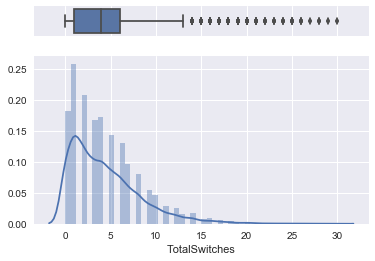

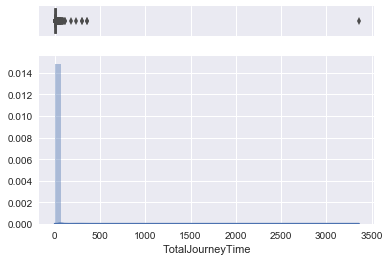

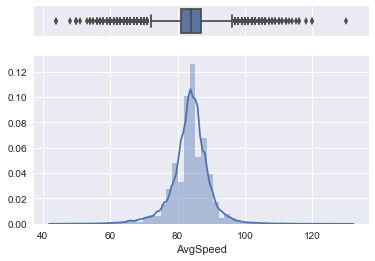

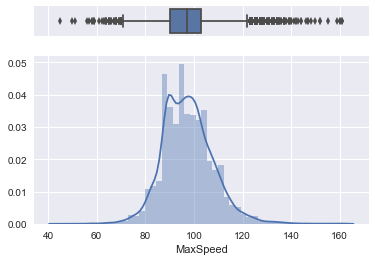

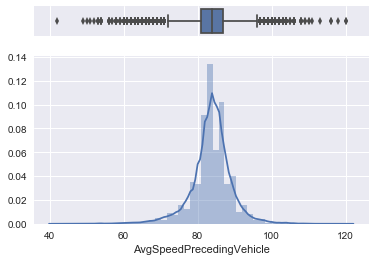

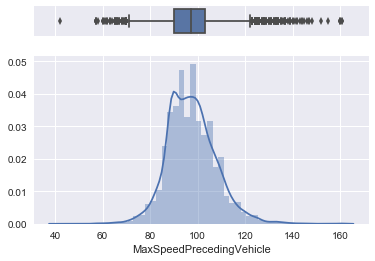

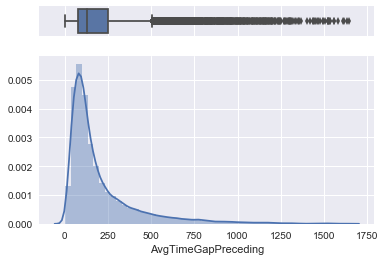

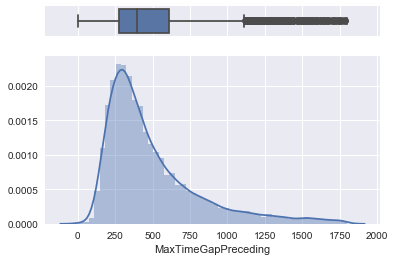

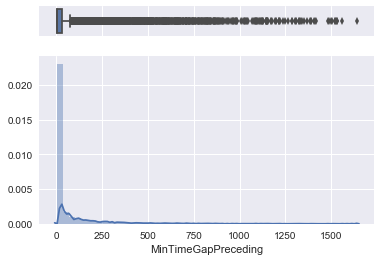

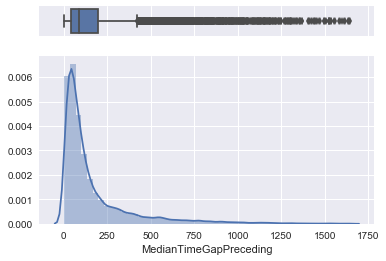

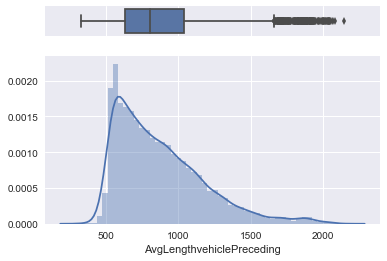

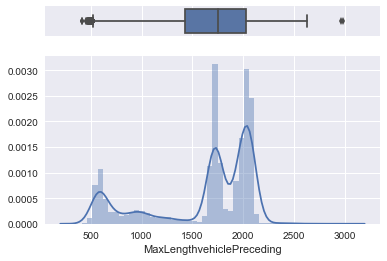

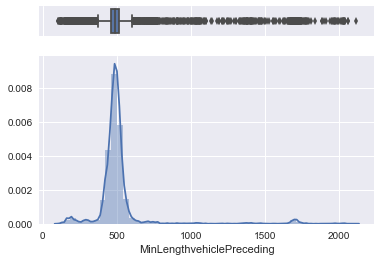

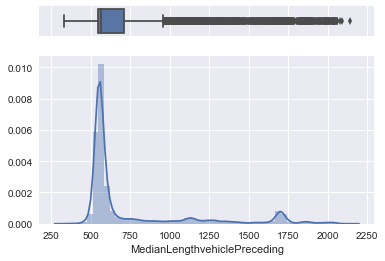

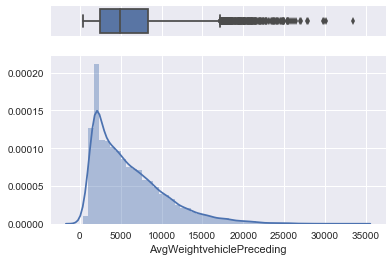

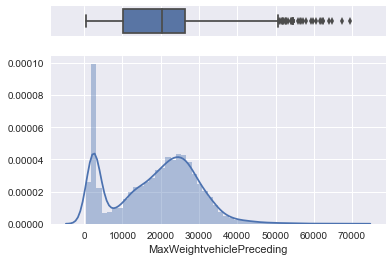

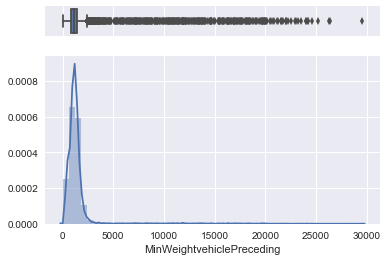

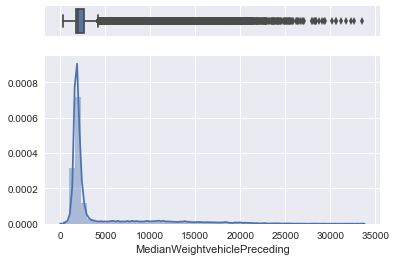

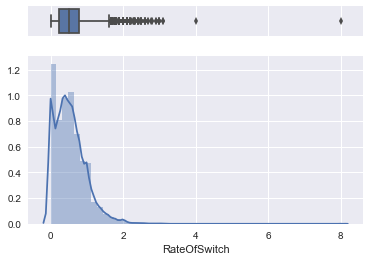

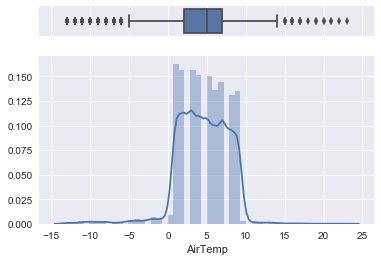

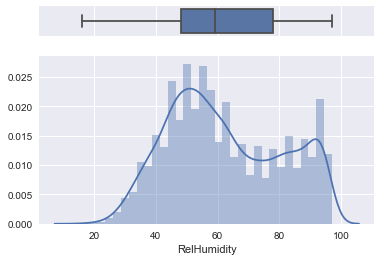

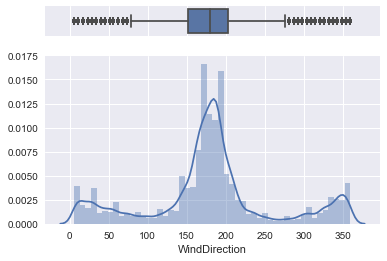

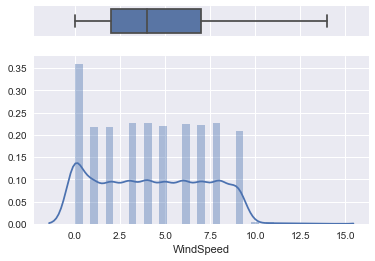

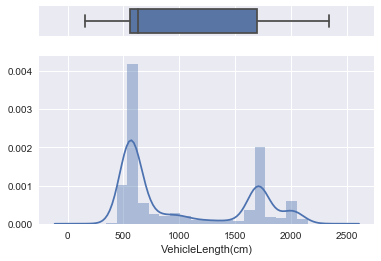

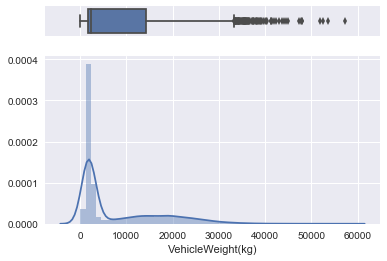

In [12]:
# plotting histogram with a boxplot on top for each variable
for i in numerical:
    plt.figure(i)
    # Cut the window in 2 parts
    f, (ax_box, ax_hist) = plt.subplots(2, sharex=True, gridspec_kw={"height_ratios": (.15, .85)})
    # Add a graph in each part
    sns.boxplot(finalRawData[i], ax=ax_box)
    sns.distplot(finalRawData[i], ax=ax_hist)

    # Remove x axis name for the boxplot
    ax_box.set(xlabel='')



Form the above analysis we can see that out of 25 numerical variables which we have 22 have outlier. Each have varied numer of outlier. we also looked at the histogram with boxplots and based upon these two analysis we have decided to take log transformations for some 11 varaibles.

In [38]:
# Taking log transformation for some varaibles
VarLogTransList = ["TotalSwitches", "AvgTimeGapPreceding", "MaxTimeGapPreceding", "MinTimeGapPreceding", 
                   "MedianTimeGapPreceding", "AvgLengthvehiclePreceding", "AvgWeightvehiclePreceding", 
                   "MedianWeightvehiclePreceding", "VehicleWeight(kg)", "VehicleLength(cm)"]
for i in VarLogTransList:
    finalRawData["log_" + i] = np.log(finalRawData[i] + 1)
    
finalRawData = finalRawData.drop(VarLogTransList, axis=1)

In [39]:
# Converting some of the variables to categorial type
catVariableList = ['RoadCondition', 'NumAxles', 'Precipitation', 'PrecipitationIntensity', 'Weekday', 'DrivingStyle']

for i in catVariableList:
    finalRawData[i] = finalRawData[i].astype('category')

In [40]:
print("Total number of numerical variables: {}".format(len(numerical)))
print("Total number of categorical variables: {}".format(len(catVariableList)))

Total number of numerical variables: 25
Total number of categorical variables: 6


In [41]:
from sklearn.preprocessing import MinMaxScaler

FinalNumerical = finalRawData.drop(catVariableList, axis = 1).columns
FinalNumerical = FinalNumerical.drop("ID")


# Initialize a scaler, then apply it to the features
scaler = MinMaxScaler() # default=(0, 1)

finalRawData[FinalNumerical] = scaler.fit_transform(finalRawData[FinalNumerical])

# Show an example of a record with scaling applied
finalRawData.head(n = 5)

,ID,TotalJourneyTime,AvgSpeed,MaxSpeed,AvgSpeedPrecedingVehicle,MaxSpeedPrecedingVehicle,MaxLengthvehiclePreceding,MinLengthvehiclePreceding,MedianLengthvehiclePreceding,MaxWeightvehiclePreceding,...,log_TotalSwitches,log_AvgTimeGapPreceding,log_MaxTimeGapPreceding,log_MinTimeGapPreceding,log_MedianTimeGapPreceding,log_AvgLengthvehiclePreceding,log_AvgWeightvehiclePreceding,log_MedianWeightvehiclePreceding,log_VehicleWeight(kg),log_VehicleLength(cm)
0,DR_24526,0.002678,0.500000,0.491379,0.576923,0.420168,0.599533,0.176207,0.141040,0.372607,...,0.468679,0.473217,0.800629,0.060417,0.370361,0.573153,0.694868,0.444303,0.759323,0.773406
1,DR_30052,0.002975,0.441860,0.396552,0.564103,0.504202,0.590183,0.162270,0.118363,0.440380,...,0.605547,0.589596,0.787499,0.278910,0.524624,0.548136,0.649711,0.385812,0.913650,0.878137
2,DR_40928,0.002678,0.476744,0.482759,0.512821,0.495798,0.503311,0.182678,0.118916,0.320504,...,0.468679,0.614011,0.782419,0.103283,0.560784,0.454930,0.561455,0.380882,0.597638,0.662245
3,DR_66033,0.002975,0.453488,0.379310,0.538462,0.445378,0.600701,0.169736,0.496681,0.479345,...,0.566662,0.563782,0.668251,0.000000,0.571211,0.694899,0.714587,0.587200,0.601530,0.837039
4,DR_45266,0.002678,0.453488,0.379310,0.525641,0.453782,0.496299,0.194624,0.148783,0.187302,...,0.521772,0.552217,0.745973,0.206566,0.439698,0.419140,0.469856,0.381214,0.588589,0.659475


In [42]:
DrivingStyle = finalRawData["DrivingStyle"]
features = finalRawData.drop(["ID","DrivingStyle"], axis=1)

In [50]:
# TODO: One-hot encode the 'features_log_minmax_transform' data using pandas.get_dummies()
features_final = pd.get_dummies(features)
features_final.head()

,TotalJourneyTime,AvgSpeed,MaxSpeed,AvgSpeedPrecedingVehicle,MaxSpeedPrecedingVehicle,MaxLengthvehiclePreceding,MinLengthvehiclePreceding,MedianLengthvehiclePreceding,MaxWeightvehiclePreceding,MinWeightvehiclePreceding,...,Weekday_5,Weekday_6,NumAxles_2,NumAxles_3,NumAxles_4,NumAxles_5,NumAxles_6,NumAxles_7,NumAxles_8,NumAxles_9
0,0.002678,0.500000,0.491379,0.576923,0.420168,0.599533,0.176207,0.141040,0.372607,0.030711,...,0,0,1,0,0,0,0,0,0,0
1,0.002975,0.441860,0.396552,0.564103,0.504202,0.590183,0.162270,0.118363,0.440380,0.012548,...,0,0,0,0,0,0,1,0,0,0
2,0.002678,0.476744,0.482759,0.512821,0.495798,0.503311,0.182678,0.118916,0.320504,0.033146,...,0,0,0,0,1,0,0,0,0,0
3,0.002975,0.453488,0.379310,0.538462,0.445378,0.600701,0.169736,0.496681,0.479345,0.017080,...,0,0,0,0,1,0,0,0,0,0
4,0.002678,0.453488,0.379310,0.525641,0.453782,0.496299,0.194624,0.148783,0.187302,0.051580,...,0,0,0,0,1,0,0,0,0,0


In [49]:
features_final.columns

Index(['TotalJourneyTime', 'AvgSpeed', 'MaxSpeed', 'AvgSpeedPrecedingVehicle',
       'MaxSpeedPrecedingVehicle', 'MaxLengthvehiclePreceding',
       'MinLengthvehiclePreceding', 'MedianLengthvehiclePreceding',
       'MaxWeightvehiclePreceding', 'MinWeightvehiclePreceding',
       'RateOfSwitch', 'AirTemp', 'RelHumidity', 'WindDirection', 'WindSpeed',
       'log_TotalSwitches', 'log_AvgTimeGapPreceding',
       'log_MaxTimeGapPreceding', 'log_MinTimeGapPreceding',
       'log_MedianTimeGapPreceding', 'log_AvgLengthvehiclePreceding',
       'log_AvgWeightvehiclePreceding', 'log_MedianWeightvehiclePreceding',
       'log_VehicleWeight(kg)', 'log_VehicleLength(cm)', 'RoadCondition_Dry',
       'RoadCondition_Snow covered', 'RoadCondition_Visible tracks',
       'RoadCondition_Wet', 'Precipitation_clear', 'Precipitation_rain',
       'Precipitation_snow', 'PrecipitationIntensity_High',
       'PrecipitationIntensity_Low', 'PrecipitationIntensity_Missing',
       'PrecipitationIntensity_M

In [51]:
# Importing train_test_split
from sklearn.cross_validation import train_test_split

# Split the 'features' and 'income' data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(features_final, 
                                                    DrivingStyle, 
                                                    test_size = 0.3, 
                                                    random_state = 0)

# Show the results of the split
print("Training set has {} samples.".format(X_train.shape[0]))
print("Testing set has {} samples.".format(X_test.shape[0]))

Training set has 8859 samples.
Testing set has 3798 samples.


C:\Users\datas\Anaconda3\lib\site-packages\sklearn\cross_validation.py:44: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [52]:
# Building models using all the above models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from time import time

# Creating list to save the information
model_name = []
train_accuracy = []
test_accuracy = []

train_recall = []
test_recall = []

train_precision = []
test_precision = []

train_fscore = []
test_fscore = []

model_run_time = []

names = ["DecisionTreeClassifier", "GaussianNB", "Linear SVM", "RBF SVM","LogisticRegression",
 "BaggingClassifier", "RandomForestClassifier", "AdaBoostClassifier", "GradientBoostingClassifier",
 "KNeighborsClassifier"] 

classifiers = [DecisionTreeClassifier(),
    GaussianNB(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    LogisticRegression(),
    BaggingClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),        
    KNeighborsClassifier()]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    start = time() # Get start time for each model building
    model_name.append(name)
    # Building model 
    clf.fit(X_train, y_train)
    
    # Scoring on test and train
    train_predictions = clf.predict(X_train)
    test_predictions = clf.predict(X_test)
        
    # Compute accuracy on the test and Train set
    train_accuracy1 = accuracy_score(y_train, train_predictions)
    test_accuracy1 = accuracy_score(y_test, test_predictions)
    
    train_accuracy.append(train_accuracy1)
    test_accuracy.append(test_accuracy1)
    
    # Compute recall on the test and Train set
    train_recall1 = recall_score(y_train, train_predictions)
    test_recall1 = recall_score(y_test, test_predictions)
    
    train_recall.append(train_recall1)
    test_recall.append(test_recall1)
    
    # Compute precision on the test and Train set
    train_precision1 = precision_score(y_train, train_predictions)
    test_precision1 = precision_score(y_test, test_predictions)
    
    train_precision.append(train_precision1)
    test_precision.append(test_precision1)
    
    # Compute F-score on the test and Train set
    train_fscore1 = 2 * (train_precision1 * train_recall1) / (train_precision1 + train_recall1)
    test_fscore1 = 2 * (test_precision1 * test_recall1) / (test_precision1 + test_recall1)
    
    train_fscore.append(train_fscore1)
    test_fscore.append(test_fscore1)   
    
    end = time() # Get end time for each model building
    model_run_time.append(end - start)
    
model_results = pd.DataFrame({
                              'model_name': pd.Series(model_name), 'model_run_time':  pd.Series(model_run_time),
                              'train_accuracy':  pd.Series(train_accuracy), 'test_accuracy': pd.Series(test_accuracy), 
                              'train_recall':  pd.Series(train_recall), 'test_recall': pd.Series(test_recall), 
                              'train_precision':  pd.Series(train_precision), 'test_precision': pd.Series(test_precision),
                              'train_fscore':  pd.Series(train_fscore), 'test_fscore': pd.Series(test_fscore)
                             }, columns = ['model_name', 'model_run_time', 'train_accuracy', 'test_accuracy',
                                          'train_recall', 'test_recall', 'train_precision', 'test_precision',
                                          'train_fscore', 'test_fscore'])
                              
model_results.to_csv("model_results_logtrans_scaled.csv")

C:\Users\datas\Anaconda3\lib\site-packages\sklearn\ensemble\weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
C:\Users\datas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\datas\Anaconda3\lib\site-packages\ipykernel\__main__.py:76: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\datas\Anaconda3\lib\site-packages\ipykernel\__main__.py:77: RuntimeWarning: invalid value encountered in double_scalars


In [53]:
model_results

,model_name,model_run_time,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_fscore,test_fscore
0,DecisionTreeClassifier,0.599482,1.000000,0.756451,1.000000,0.428928,1.000000,0.424168,1.000000,0.426534
1,GaussianNB,0.089374,0.700643,0.702738,0.675833,0.662095,0.385288,0.382289,0.490783,0.484710
2,Linear SVM,11.006905,0.786545,0.788836,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3,RBF SVM,14.149461,0.789931,0.791996,0.020624,0.019950,0.812500,0.800000,0.040227,0.038929
4,LogisticRegression,0.206951,0.810137,0.811743,0.245373,0.251870,0.645341,0.637224,0.355556,0.361037
5,BaggingClassifier,3.227624,0.982955,0.820958,0.925436,0.365337,0.994318,0.631466,0.958641,0.462875
6,RandomForestClassifier,0.507614,0.986680,0.806477,0.940243,0.295511,0.997196,0.582310,0.967882,0.392060
7,AdaBoostClassifier,1.919957,0.827859,0.807004,0.334744,0.285536,0.703333,0.588689,0.453601,0.384551
8,GradientBoostingClassifier,3.107790,0.860707,0.826224,0.468006,0.371571,0.795148,0.656388,0.589214,0.474522
9,KNeighborsClassifier,13.515811,0.844565,0.775671,0.454786,0.299252,0.713101,0.452830,0.555376,0.360360


In [62]:
# Generating the confusion matrix for Gaussian Naive Bayes algorithm

clf = GaussianNB()
clf.fit(X_train, y_train)
    
# Scoring on test and train
train_predictions = clf.predict(X_train)
test_predictions = clf.predict(X_test)

pd.crosstab(y_train, train_predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,4929,2039,6968
1,613,1278,1891
All,5542,3317,8859


In [90]:
pd.crosstab(y_test, test_predictions, rownames=['True'], colnames=['Predicted'], margins=True)

Predicted,0,1,All
True,,,
0,2138,858,2996
1,271,531,802
All,2409,1389,3798


In [58]:
from sklearn.decomposition import RandomizedPCA
from sklearn.decomposition import PCA
from sklearn.svm import SVC
n_components = 40

print( "Extracting the top %d eigenfaces from %d faces" % (n_components, X_train.shape[0]) )
t0 = time()

# TODO: Create an instance of PCA, initializing with n_components=n_components and whiten=True
pca = PCA(n_components=n_components, whiten=True, svd_solver='randomized')

#TODO: pass the training dataset (X_train) to pca's 'fit()' method
pca = pca.fit(X_train)


print("done in %0.3fs" % (time() - t0))

Extracting the top 40 eigenfaces from 8859 faces
done in 0.148s


In [59]:
#eigenfaces = pca.components_.reshape((n_components, h, w))

t0 = time()
X_train_pca = pca.transform(X_train)
X_test_pca = pca.transform(X_test)
print("done in %0.3fs" % (time() - t0))

done in 0.019s


In [60]:
# Building models using all the above models
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import BaggingClassifier, AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score, recall_score, precision_score, f1_score
from time import time

# Creating list to save the information
model_name = []
train_accuracy = []
test_accuracy = []

train_recall = []
test_recall = []

train_precision = []
test_precision = []

train_fscore = []
test_fscore = []

model_run_time = []

names = ["DecisionTreeClassifier", "GaussianNB", "Linear SVM", "RBF SVM","LogisticRegression",
 "BaggingClassifier", "RandomForestClassifier", "AdaBoostClassifier", "GradientBoostingClassifier",
 "KNeighborsClassifier"] 

classifiers = [DecisionTreeClassifier(),
    GaussianNB(),
    SVC(kernel="linear"),
    SVC(kernel="rbf"),
    LogisticRegression(),
    BaggingClassifier(),
    RandomForestClassifier(),
    AdaBoostClassifier(),
    GradientBoostingClassifier(),        
    KNeighborsClassifier()]


# iterate over classifiers
for name, clf in zip(names, classifiers):
    start = time() # Get start time for each model building
    model_name.append(name)
    # Building model 
    clf.fit(X_train_pca, y_train)
    
    # Scoring on test and train
    train_predictions = clf.predict(X_train_pca)
    test_predictions = clf.predict(X_test_pca)
        
    # Compute accuracy on the test and Train set
    train_accuracy1 = accuracy_score(y_train, train_predictions)
    test_accuracy1 = accuracy_score(y_test, test_predictions)
    
    train_accuracy.append(train_accuracy1)
    test_accuracy.append(test_accuracy1)
    
    # Compute recall on the test and Train set
    train_recall1 = recall_score(y_train, train_predictions)
    test_recall1 = recall_score(y_test, test_predictions)
    
    train_recall.append(train_recall1)
    test_recall.append(test_recall1)
    
    # Compute precision on the test and Train set
    train_precision1 = precision_score(y_train, train_predictions)
    test_precision1 = precision_score(y_test, test_predictions)
    
    train_precision.append(train_precision1)
    test_precision.append(test_precision1)
    
    # Compute F-score on the test and Train set
    train_fscore1 = 2 * (train_precision1 * train_recall1) / (train_precision1 + train_recall1)
    test_fscore1 = 2 * (test_precision1 * test_recall1) / (test_precision1 + test_recall1)
    
    train_fscore.append(train_fscore1)
    test_fscore.append(test_fscore1)   
    
    end = time() # Get end time for each model building
    model_run_time.append(end - start)
    
model_results_pca = pd.DataFrame({
                              'model_name': pd.Series(model_name), 'model_run_time':  pd.Series(model_run_time),
                              'train_accuracy':  pd.Series(train_accuracy), 'test_accuracy': pd.Series(test_accuracy), 
                              'train_recall':  pd.Series(train_recall), 'test_recall': pd.Series(test_recall), 
                              'train_precision':  pd.Series(train_precision), 'test_precision': pd.Series(test_precision),
                              'train_fscore':  pd.Series(train_fscore), 'test_fscore': pd.Series(test_fscore)
                             }, columns = ['model_name', 'model_run_time', 'train_accuracy', 'test_accuracy',
                                          'train_recall', 'test_recall', 'train_precision', 'test_precision',
                                          'train_fscore', 'test_fscore'])
                              
model_results_pca.to_csv("model_results_Scale_pca_log.csv")

C:\Users\datas\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1113: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 due to no predicted samples.
  'precision', 'predicted', average, warn_for)
C:\Users\datas\Anaconda3\lib\site-packages\ipykernel\__main__.py:76: RuntimeWarning: invalid value encountered in double_scalars
C:\Users\datas\Anaconda3\lib\site-packages\ipykernel\__main__.py:77: RuntimeWarning: invalid value encountered in double_scalars


In [61]:
model_results_pca

,model_name,model_run_time,train_accuracy,test_accuracy,train_recall,test_recall,train_precision,test_precision,train_fscore,test_fscore
0,DecisionTreeClassifier,1.626191,1.000000,0.734597,1.000000,0.406484,1.000000,0.379953,1.000000,0.392771
1,GaussianNB,0.052472,0.763292,0.761453,0.436806,0.440150,0.444564,0.435802,0.440651,0.437965
2,Linear SVM,15.375756,0.786545,0.788836,0.000000,0.000000,0.000000,0.000000,NaN,NaN
3,RBF SVM,14.241705,0.845468,0.809373,0.329984,0.205736,0.859504,0.654762,0.476882,0.313093
4,LogisticRegression,0.091584,0.810588,0.810427,0.255949,0.263092,0.641060,0.620588,0.365835,0.369527
5,BaggingClassifier,8.706322,0.982165,0.802528,0.919619,0.311721,0.996562,0.558036,0.956546,0.400000
6,RandomForestClassifier,1.306443,0.983971,0.802264,0.926494,0.256858,0.998291,0.570637,0.961053,0.354256
7,AdaBoostClassifier,6.009754,0.817474,0.806477,0.305130,0.278055,0.655682,0.588391,0.416456,0.377646
8,GradientBoostingClassifier,7.254126,0.849080,0.816482,0.371761,0.285536,0.825117,0.648725,0.512577,0.396537
9,KNeighborsClassifier,22.566356,0.844452,0.780147,0.405605,0.218204,0.751224,0.456919,0.526786,0.295359


In [136]:
# Figuring out optiml cutoff in training and see if the results sustain
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(X_train, y_train)

prob = pd.Series(lr.predict_proba(X_train)[:, 1])

cutoff = []
TPR = []
TNR = []
Accuracy = []

Precision =[]

for i in np.arange(0.2, 0.8, 0.01):
    cutoff.append(i)
    predicted = prob.apply(lambda x: 1 if x >= i else 0)
    crosstab = pd.crosstab(y_train, predicted, rownames=['True'], colnames=['Predicted'], margins=False)
    
    TPR.append(round(crosstab.loc[1,1]/crosstab.iloc[1,:].sum(), 2))
    TNR.append(round(crosstab.loc[0,0]/crosstab.iloc[0,:].sum(), 2))
    
    Accuracy.append(round((crosstab.loc[1,1] + crosstab.loc[0,0])/(crosstab.loc[1,1] + crosstab.loc[0,0] + crosstab.loc[0,1] + crosstab.loc[1,0]), 2))
    Precision.append(round(crosstab.loc[1,1]/crosstab.iloc[:,1].sum(), 2))

optimalCuttOff = pd.DataFrame({
                              'cutoff': pd.Series(cutoff), 'TPR':  pd.Series(TPR),
                              'TNR':  pd.Series(TNR), 'Accuracy': pd.Series(Accuracy), 
                              'Precision':  pd.Series(Precision)
                             }, columns = ['cutoff', 'TPR', 'TNR', 'Accuracy','Precision'])
    
from numpy import loadtxt
from xgboost import XGBClassifieroptimalCuttOff.to_csv("optimalCuttOff.csv")                 

# Trying XGBOOST Model 

In [153]:

from numpy import loadtxt
from xgboost import XGBClassifier
# fit model no training data
model = XGBClassifier()
model.fit(X_train, y_train)
# make predictions for test data
y_pred_train = model.predict(X_train)
y_pred = model.predict(X_test)
predictions = [round(value) for value in y_pred]
# evaluate predictions
accuracy = accuracy_score(y_test, predictions)
print("Test Accuracy: %.2f%%" % (accuracy * 100.0))
test_recall1 = recall_score(y_test, predictions)
print("test Recall: %.2f%%" % (test_recall1 * 100.0))

predictions_train = [round(value) for value in y_pred_train]
accuracy = accuracy_score(y_train, predictions_train)
print("Train Accuracy: %.2f%%" % (accuracy * 100.0))
train_recall1 = recall_score(y_train, predictions_train)
print("Test Recall: %.2f%%" % (train_recall1 * 100.0))

C:\Users\datas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:
C:\Users\datas\Anaconda3\lib\site-packages\sklearn\preprocessing\label.py:171: DeprecationWarning: The truth value of an empty array is ambiguous. Returning False, but in future this will result in an error. Use `array.size > 0` to check that an array is not empty.
  if diff:


Test Accuracy: 82.10%
test Recall: 39.78%
Train Accuracy: 100.00%
Test Recall: 100.00%


In [151]:
test_recall1 = recall_score(y_test, predictions)
print("Accuracy: %.2f%%" % (test_recall1 * 100.0))

Accuracy: 36.53%
